# MATH 210 Introduction to Mathematical Computing

## March 29, 2017

1. Exploring the World Bank Databank
    * Selecting and dowloading data
    * Deleting irregular rows
    * Dealing with missing data
    * Select the index and delete unwamted rows
2. GDP per capita in the European Union
    * Time series plot
    * Average GDP per capita (using `.mean` and `.sort_values`)
    * Correlation between countries (using `.corr`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 1. World Bank Databank

The [World Bank Databank](http://databank.worldbank.org/data/home.aspx) is a wonderful tool for accessing all kinds of data hosted by the World Bank. Let's construct and download a dataset from the World Development Indicators database. In the menu, click "Databases" and then click "World Development Indicators".

### Selecting and downloading data

The DataBank tool allows us to select countries and series and time ranges. There are a lot of choices! Let's try to focus on something simple. Let's look at GDP per capita for all the [28 member countries](https://europa.eu/european-union/about-eu/countries_en) in the European Union: Austria, Belgium, Bulgaria, etc.

After selecting each country and the series "GDP per capita (current US$)", go to the Layout tab and we choose to display the data with time in the rows, countries in the columns, and the one series as the page. When we're done making our changes, we click "Apply Changes" and our table is generated. Finally, click "Download Options" and select CSV.

I downloaded the data and called it `gdp_data_raw.csv`. Let's import it!

In [2]:
df_1 = pd.read_csv("gdp_data_raw.csv")

In [3]:
df_1.head()

,Series Name,Series Code,Time,Time Code,United Kingdom [GBR],Sweden [SWE],Austria [AUT],Belgium [BEL],Bulgaria [BGR],Croatia [HRV],...,Lithuania [LTU],Luxembourg [LUX],Malta [MLT],Netherlands [NLD],Poland [POL],Portugal [PRT],Romania [ROU],Slovak Republic [SVK],Slovenia [SVN],Spain [ESP]
0,GDP per capita (current US$),NY.GDP.PCAP.CD,1992.0,YR1992,20487.1707852878,32338.5039496678,24820.2278258852,23497.7274067423,1211.98087810931,..,...,..,40850.5430776901,8364.91783402056,23598.9507648691,2459.02068468253,10811.630636571,1102.10378473246,2908.81083227843,..,16105.4187285163
1,GDP per capita (current US$),NY.GDP.PCAP.CD,1993.0,YR1993,18389.0195675099,24080.8996705645,24023.515467019,22403.2168180008,1278.24717346108,..,...,..,41362.4425360461,7428.43052662627,22827.3000431587,2497.19524116689,9535.59484910868,1158.13251591344,3089.43827648565,..,13362.0183458364
2,GDP per capita (current US$),NY.GDP.PCAP.CD,1994.0,YR1994,19709.2380983653,25747.2416875525,25584.9178245938,24338.1377018161,1148.4943993817,..,...,..,45353.9912706396,8149.59503436951,24331.7540182404,2874.8253108452,9978.30193697855,1323.10432504932,3755.72773656894,..,13465.3778261116
3,GDP per capita (current US$),NY.GDP.PCAP.CD,1995.0,YR1995,22755.5621228195,29914.331746409,30252.7946924041,28565.9191516066,1554.04693051431,4794.93721251327,...,2168.79609901209,52682.6838441695,9286.24584368775,28884.7135222434,3682.79121526652,11782.5214789678,1660.2727683158,4799.15105117605,10690.6652278647,15561.9727455217
4,GDP per capita (current US$),NY.GDP.PCAP.CD,1996.0,YR1996,23947.958749578,32587.2641044641,29742.4288063177,27701.903287059,1208.85023311979,5268.80567364512,...,2328.15380783134,52485.8215068641,9579.81243747356,28698.6660159512,4140.98354114142,12185.0638930534,1643.88045981491,5177.74886425007,10801.4284305547,16236.7716792911


In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 32 columns):
Series Name              27 non-null object
Series Code              25 non-null object
Time                     25 non-null float64
Time Code                25 non-null object
United Kingdom [GBR]     25 non-null object
Sweden [SWE]             25 non-null object
Austria [AUT]            25 non-null object
Belgium [BEL]            25 non-null object
Bulgaria [BGR]           25 non-null object
Croatia [HRV]            25 non-null object
Cyprus [CYP]             25 non-null object
Czech Republic [CZE]     25 non-null object
Denmark [DNK]            25 non-null object
Estonia [EST]            25 non-null object
Finland [FIN]            25 non-null object
France [FRA]             25 non-null object
Germany [DEU]            25 non-null object
Greece [GRC]             25 non-null object
Hungary [HUN]            25 non-null object
Ireland [IRL]            25 non-null object
Italy [ITA]     

That's weird. All the columns are strings. Why not numbers? Open the `.csv` file and look at the last lines. There are some extra lines that are screwing things up:

```
GDP per capita (current US$),NY.GDP.PCAP.CD,2016,YR2016,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Data from database: World Development Indicators,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Last Updated: 03/23/2017,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
```

Let's delete them and save the file as `gdp_data.csv` and try `read_csv` again:

In [5]:
df_2 = pd.read_csv("gdp_data.csv")

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 32 columns):
Series Name              24 non-null object
Series Code              24 non-null object
Time                     24 non-null int64
Time Code                24 non-null object
United Kingdom [GBR]     24 non-null float64
Sweden [SWE]             24 non-null float64
Austria [AUT]            24 non-null float64
Belgium [BEL]            24 non-null float64
Bulgaria [BGR]           24 non-null float64
Croatia [HRV]            24 non-null object
Cyprus [CYP]             24 non-null float64
Czech Republic [CZE]     24 non-null float64
Denmark [DNK]            24 non-null float64
Estonia [EST]            24 non-null object
Finland [FIN]            24 non-null float64
France [FRA]             24 non-null float64
Germany [DEU]            24 non-null float64
Greece [GRC]             24 non-null float64
Hungary [HUN]            24 non-null float64
Ireland [IRL]            24 non-null float64
Ital

Now what?!! Some of the columns are still strings! Let's take a look at Croatia:

In [7]:
df_2['Croatia [HRV]'].head()

0                  ..
1                  ..
2                  ..
3    4794.93721251327
4    5268.80567364512
Name: Croatia [HRV], dtype: object

There's missing data entered as two periods `..` and so let's import again but tell pandas to treat the string `..` as NaN (NumPy "not a number" datatype).

In [8]:
df_3 = pd.read_csv("gdp_data.csv",na_values=['..'])

In [9]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 32 columns):
Series Name              24 non-null object
Series Code              24 non-null object
Time                     24 non-null int64
Time Code                24 non-null object
United Kingdom [GBR]     24 non-null float64
Sweden [SWE]             24 non-null float64
Austria [AUT]            24 non-null float64
Belgium [BEL]            24 non-null float64
Bulgaria [BGR]           24 non-null float64
Croatia [HRV]            21 non-null float64
Cyprus [CYP]             24 non-null float64
Czech Republic [CZE]     24 non-null float64
Denmark [DNK]            24 non-null float64
Estonia [EST]            21 non-null float64
Finland [FIN]            24 non-null float64
France [FRA]             24 non-null float64
Germany [DEU]            24 non-null float64
Greece [GRC]             24 non-null float64
Hungary [HUN]            24 non-null float64
Ireland [IRL]            24 non-null float64
It

We should set the time column as the index. Let's import one more time!

In [10]:
gdp_data = pd.read_csv("gdp_data.csv",na_values=['..'],index_col=2)

In [11]:
gdp_data.head()

,Series Name,Series Code,Time Code,United Kingdom [GBR],Sweden [SWE],Austria [AUT],Belgium [BEL],Bulgaria [BGR],Croatia [HRV],Cyprus [CYP],...,Lithuania [LTU],Luxembourg [LUX],Malta [MLT],Netherlands [NLD],Poland [POL],Portugal [PRT],Romania [ROU],Slovak Republic [SVK],Slovenia [SVN],Spain [ESP]
Time,,,,,,,,,,,,,,,,,,,,,
1992,GDP per capita (current US$),NY.GDP.PCAP.CD,YR1992,20487.170785,32338.503950,24820.227826,23497.727407,1211.980878,NaN,11310.071924,...,NaN,40850.543078,8364.917834,23598.950765,2459.020685,10811.630637,1102.103785,2908.810832,NaN,16105.418729
1993,GDP per capita (current US$),NY.GDP.PCAP.CD,YR1993,18389.019568,24080.899671,24023.515467,22403.216818,1278.247173,NaN,10526.141770,...,NaN,41362.442536,7428.430527,22827.300043,2497.195241,9535.594849,1158.132516,3089.438276,NaN,13362.018346
1994,GDP per capita (current US$),NY.GDP.PCAP.CD,YR1994,19709.238098,25747.241688,25584.917825,24338.137702,1148.494399,NaN,11617.692778,...,NaN,45353.991271,8149.595034,24331.754018,2874.825311,9978.301937,1323.104325,3755.727737,NaN,13465.377826
1995,GDP per capita (current US$),NY.GDP.PCAP.CD,YR1995,22755.562123,29914.331746,30252.794692,28565.919152,1554.046931,4794.937213,15098.006017,...,2168.796099,52682.683844,9286.245844,28884.713522,3682.791215,11782.521479,1660.272768,4799.151051,10690.665228,15561.972746
1996,GDP per capita (current US$),NY.GDP.PCAP.CD,YR1996,23947.958750,32587.264104,29742.428806,27701.903287,1208.850233,5268.805674,14969.422791,...,2328.153808,52485.821507,9579.812437,28698.666016,4140.983541,12185.063893,1643.880460,5177.748864,10801.428431,16236.771679


We don't need columns 0, 1 and 2 and so let's delete them from the dataframe:

In [12]:
del gdp_data['Series Name']
del gdp_data['Series Code']
del gdp_data['Time Code']

In [13]:
gdp_data.head()

,United Kingdom [GBR],Sweden [SWE],Austria [AUT],Belgium [BEL],Bulgaria [BGR],Croatia [HRV],Cyprus [CYP],Czech Republic [CZE],Denmark [DNK],Estonia [EST],...,Lithuania [LTU],Luxembourg [LUX],Malta [MLT],Netherlands [NLD],Poland [POL],Portugal [PRT],Romania [ROU],Slovak Republic [SVK],Slovenia [SVN],Spain [ESP]
Time,,,,,,,,,,,,,,,,,,,,,
1992,20487.170785,32338.503950,24820.227826,23497.727407,1211.980878,NaN,11310.071924,3338.655158,29526.166602,NaN,...,NaN,40850.543078,8364.917834,23598.950765,2459.020685,10811.630637,1102.103785,2908.810832,NaN,16105.418729
1993,18389.019568,24080.899671,24023.515467,22403.216818,1278.247173,NaN,10526.141770,3916.051656,27553.122029,NaN,...,NaN,41362.442536,7428.430527,22827.300043,2497.195241,9535.594849,1158.132516,3089.438276,NaN,13362.018346
1994,19709.238098,25747.241688,25584.917825,24338.137702,1148.494399,NaN,11617.692778,4583.584499,29992.221471,NaN,...,NaN,45353.991271,8149.595034,24331.754018,2874.825311,9978.301937,1323.104325,3755.727737,NaN,13465.377826
1995,22755.562123,29914.331746,30252.794692,28565.919152,1554.046931,4794.937213,15098.006017,5765.048439,35351.380707,3044.379109,...,2168.796099,52682.683844,9286.245844,28884.713522,3682.791215,11782.521479,1660.272768,4799.151051,10690.665228,15561.972746
1996,23947.958750,32587.264104,29742.428806,27701.903287,1208.850233,5268.805674,14969.422791,6473.435452,35650.724342,3352.730250,...,2328.153808,52485.821507,9579.812437,28698.666016,4140.983541,12185.063893,1643.880460,5177.748864,10801.428431,16236.771679


In [14]:
gdp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 1992 to 2015
Data columns (total 28 columns):
United Kingdom [GBR]     24 non-null float64
Sweden [SWE]             24 non-null float64
Austria [AUT]            24 non-null float64
Belgium [BEL]            24 non-null float64
Bulgaria [BGR]           24 non-null float64
Croatia [HRV]            21 non-null float64
Cyprus [CYP]             24 non-null float64
Czech Republic [CZE]     24 non-null float64
Denmark [DNK]            24 non-null float64
Estonia [EST]            21 non-null float64
Finland [FIN]            24 non-null float64
France [FRA]             24 non-null float64
Germany [DEU]            24 non-null float64
Greece [GRC]             24 non-null float64
Hungary [HUN]            24 non-null float64
Ireland [IRL]            24 non-null float64
Italy [ITA]              24 non-null float64
Latvia [LVA]             21 non-null float64
Lithuania [LTU]          21 non-null float64
Luxembourg [LUX]         24 non-null 

Perfect! Now we have a clean dataset imported as pandas dataframe with each column as floats (as they should be).

## 2. GDP per capita in the European Union

Let's plot the GDP data in a variety of different ways!

### Time series

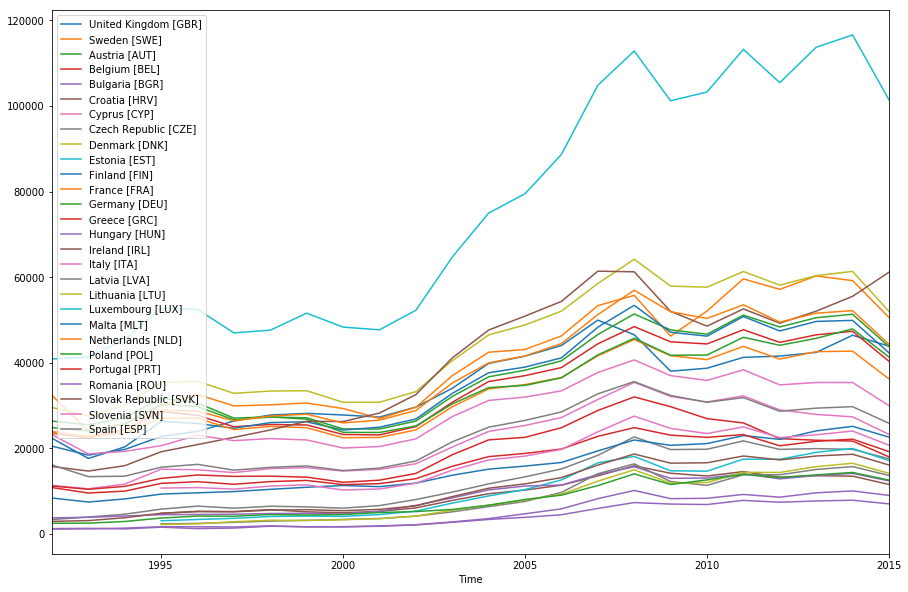

In [15]:
gdp_data.plot(figsize=(15,10))

### Average GDP per capital since 1995

There is some missing data for years 1992-1994 and so let's plot the averages since 1995 as a bar plot (and sort the values from lowest to highest).

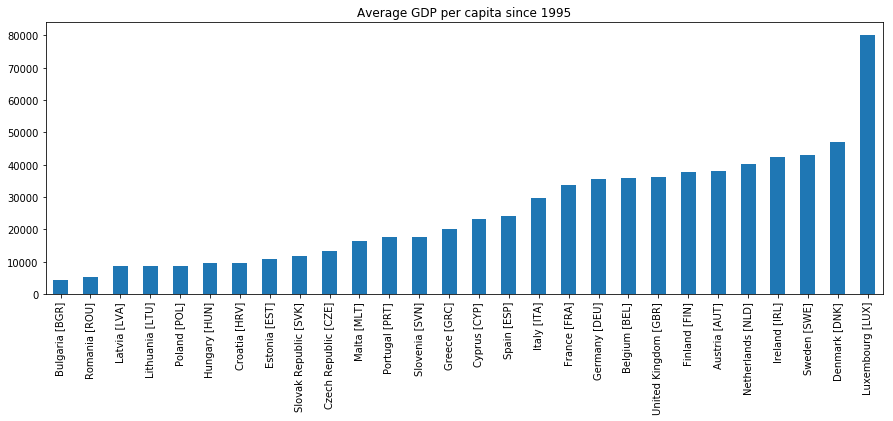

In [16]:
gdp_data.loc[1995:].mean().sort_values().plot(kind='bar',figsize=(15,5),title='Average GDP per capita since 1995')

### Correlation between countries

In [17]:
gdp_data.corr()

,United Kingdom [GBR],Sweden [SWE],Austria [AUT],Belgium [BEL],Bulgaria [BGR],Croatia [HRV],Cyprus [CYP],Czech Republic [CZE],Denmark [DNK],Estonia [EST],...,Lithuania [LTU],Luxembourg [LUX],Malta [MLT],Netherlands [NLD],Poland [POL],Portugal [PRT],Romania [ROU],Slovak Republic [SVK],Slovenia [SVN],Spain [ESP]
United Kingdom [GBR],1.000000,0.902489,0.889334,0.899784,0.869459,0.906926,0.917868,0.910127,0.920864,0.916359,...,0.892471,0.916337,0.905991,0.922556,0.895914,0.933506,0.885634,0.925452,0.906622,0.925264
Sweden [SWE],0.902489,1.000000,0.979220,0.975951,0.966726,0.956287,0.920749,0.963981,0.975818,0.979226,...,0.975358,0.981749,0.969435,0.964857,0.969787,0.950040,0.966547,0.974520,0.954046,0.939211
Austria [AUT],0.889334,0.979220,1.000000,0.998476,0.978770,0.979548,0.953179,0.985237,0.994845,0.972439,...,0.968053,0.993651,0.967404,0.989515,0.976248,0.973608,0.980953,0.986490,0.981350,0.963339
Belgium [BEL],0.899784,0.975951,0.998476,1.000000,0.971713,0.984946,0.964898,0.985744,0.997861,0.966450,...,0.959133,0.992013,0.961007,0.994071,0.969898,0.982081,0.974602,0.985403,0.986657,0.974289
Bulgaria [BGR],0.869459,0.966726,0.978770,0.971713,1.000000,0.965382,0.921091,0.983485,0.967545,0.986115,...,0.990605,0.986573,0.988726,0.965881,0.992638,0.948868,0.993297,0.988285,0.964537,0.932144
Croatia [HRV],0.906926,0.956287,0.979548,0.984946,0.965382,1.000000,0.983959,0.994401,0.990622,0.965059,...,0.956949,0.981141,0.950311,0.996213,0.965010,0.994310,0.969465,0.987188,0.998130,0.988530
Cyprus [CYP],0.917868,0.920749,0.953179,0.964898,0.921091,0.983959,1.000000,0.972371,0.974898,0.909035,...,0.894195,0.950978,0.914013,0.984711,0.929940,0.991588,0.924538,0.958827,0.982738,0.989296
Czech Republic [CZE],0.910127,0.963981,0.985237,0.985744,0.983485,0.994401,0.972371,1.000000,0.988956,0.977311,...,0.974505,0.990510,0.975985,0.991898,0.987955,0.983920,0.983952,0.995776,0.992366,0.971690
Denmark [DNK],0.920864,0.975818,0.994845,0.997861,0.967545,0.990622,0.974898,0.988956,1.000000,0.969133,...,0.960162,0.991758,0.962619,0.997629,0.971443,0.989271,0.972571,0.988604,0.991241,0.981512
Estonia [EST],0.916359,0.979226,0.972439,0.966450,0.986115,0.965059,0.909035,0.977311,0.969133,1.000000,...,0.997394,0.990660,0.990012,0.964178,0.989715,0.946501,0.991069,0.991941,0.964104,0.930266


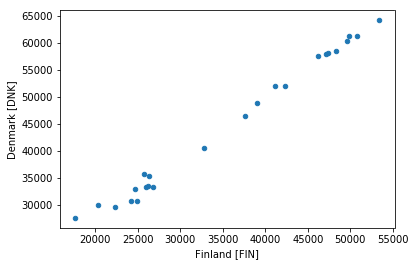

In [18]:
# x=0 means x axis is column 0
# y=1 means y axis is column 1
gdp_data[['Finland [FIN]','Denmark [DNK]']].plot(kind='scatter',x=0,y=1)